# K-means Clustering Algorithm Implementation

K-means is a popular clustering algorithm that helps us group similar data points together. Here's what we'll do:

1. First, we'll import necessary Python libraries:
   - numpy: For handling arrays and mathematical operations
   - matplotlib: For creating visualizations
   - scipy: For calculating distances between points

2. Then we'll create sample data to test our algorithm
3. Implement the K-means algorithm from scratch
4. Compare our results with scikit-learn's implementation

In [ ]:
# Import necessary libraries
from __future__ import print_function  # This makes our code work in both Python 2 and 3

# numpy is a powerful library for working with arrays and mathematical operations
import numpy as np                     

# matplotlib is a plotting library - we use it to create visual graphs and charts
import matplotlib.pyplot as plt        

# cdist from scipy.spatial.distance helps us calculate distances between points
# We'll use this to find how far each point is from the cluster centers
from scipy.spatial.distance import cdist  

# Set a random seed so we get the same random numbers each time we run the code
# This helps make our results reproducible
np.random.seed(11)                    

# Creating Sample Data

Before we can cluster data, we need some data to work with. We'll create synthetic data with three clear groups (clusters):

1. We'll define three center points (means) for our clusters
2. Create random points around these centers using normal distribution
   - Normal distribution means the points will be spread out in a bell curve shape
   - Most points will be near the center, fewer points further away
3. Each cluster will have 100 points
4. We'll combine all points into one dataset

In [ ]:
# Define three points that will be the centers of our clusters
# Each point has an x and y coordinate: [x, y]
means = [[2, 2],    # Center of first cluster
         [8, 3],    # Center of second cluster
         [3, 6]]    # Center of third cluster

# The covariance matrix determines how spread out our points will be
# [[1, 0], [0, 1]] means:
# - Points spread equally in x and y directions
# - No correlation between x and y (points spread in a circle, not diagonal)
cov = [[1, 0], 
       [0, 1]]

# We'll create 100 points for each cluster
N = 100

# Generate random points around each center using normal distribution
# np.random.multivariate_normal creates points in a bell curve shape around each center
X0 = np.random.multivariate_normal(means[0], cov, N)  # 100 points around first center
X1 = np.random.multivariate_normal(means[1], cov, N)  # 100 points around second center
X2 = np.random.multivariate_normal(means[2], cov, N)  # 100 points around third center

# Combine all points into one big array (300 points total)
# axis=0 means we're stacking the arrays vertically
X = np.concatenate((X0, X1, X2), axis = 0)

# We know we want 3 clusters because we created the data with 3 centers
K = 3

# Create labels for our points (0, 1, or 2 for each cluster)
# This is the "ground truth" - we know these are the real clusters
# [0]*N creates N zeros, [1]*N creates N ones, etc.
original_label = np.asarray([0]*N + [1]*N + [2]*N).T  # .T transposes the array

In [9]:
X

array([[ 3.74945474e+00,  1.71392700e+00],
       [ 1.51543487e+00, -6.53318559e-01],
       [ 1.99171537e+00,  1.68036864e+00],
       [ 1.46337064e+00,  2.31540267e+00],
       [ 2.42105072e+00,  9.34397020e-01],
       [ 1.11376033e+00,  1.52426651e+00],
       [ 2.68968231e+00,  2.56119218e+00],
       [ 6.94451490e-01,  8.80524738e-01],
       [ 2.73683739e+00,  3.57463407e+00],
       [ 1.96892491e+00,  1.31655337e+00],
       [ 3.09562970e+00,  1.69042336e+00],
       [ 2.72575222e+00,  3.54907163e+00],
       [ 2.63007982e+00,  2.07349324e+00],
       [ 2.73227135e+00,  1.35742461e+00],
       [ 1.82190682e+00,  1.42604544e+00],
       [ 1.79562468e+00,  1.51350490e+00],
       [ 1.81422468e+00,  1.61946358e+00],
       [ 2.08897764e+00,  2.06367166e+00],
       [ 2.29634711e+00,  3.40277112e+00],
       [ 4.53137432e-01,  3.29561858e+00],
       [ 1.76274955e+00,  7.67653793e-01],
       [ 1.82758023e+00,  2.09183837e+00],
       [ 3.06755846e+00,  9.38365552e-01],
       [ 2.

# Visualizing the Clusters

To understand our data and results better, we need to visualize it. We'll create a function that:
1. Takes our data points and their cluster labels
2. Separates points by their cluster
3. Plots each cluster with different colors and shapes:
   - Cluster 0: Blue triangles
   - Cluster 1: Green circles
   - Cluster 2: Red squares

This will help us see if our clustering algorithm is working correctly.

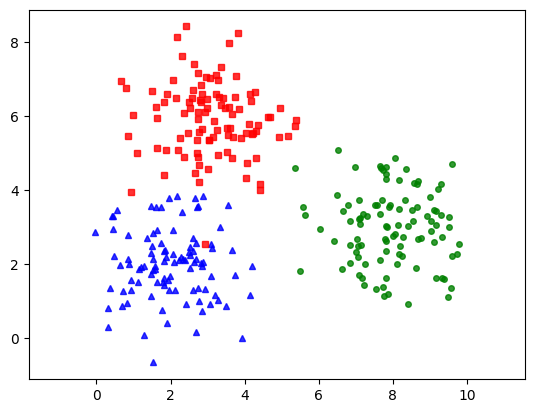

In [3]:
# Function to display our clustering results
def kmeans_display(X, label):
    # Find how many clusters we have (K)
    # np.amax finds the largest label number and adds 1 
    # (because labels start at 0)
    K = np.amax(label) + 1
    
    # Separate points by their cluster labels
    # X[label == 0, :] finds all points where label is 0
    # and gets both their x and y coordinates (:)
    X0 = X[label == 0, :]  # Get all points in cluster 0
    X1 = X[label == 1, :]  # Get all points in cluster 1
    X2 = X[label == 2, :]  # Get all points in cluster 2

    # Plot each cluster with different colors and shapes
    # 'b^' means blue triangles
    # markersize=4 makes the points smaller
    # alpha=.8 makes them slightly transparent
    plt.plot(X0[:, 0], X0[:, 1], 'b^', markersize = 4, alpha = .8)  # Plot cluster 0
    plt.plot(X1[:, 0], X1[:, 1], 'go', markersize = 4, alpha = .8)  # Plot cluster 1
    plt.plot(X2[:, 0], X2[:, 1], 'rs', markersize = 4, alpha = .8)  # Plot cluster 2

    # Make sure the plot looks proportional
    # (circles look like circles, not ovals)
    plt.axis('equal')
    plt.plot()
    # Display the plot
    plt.show()

# Show our original data with the true cluster labels
kmeans_display(X, original_label)

# K-means Algorithm Helper Functions

The K-means algorithm needs several helper functions to work. Let's understand each one:

1. `kmeans_init_centers`: 
   - Picks K random points as initial cluster centers
   - These centers will be improved in later steps

2. `kmeans_assign_labels`:
   - Finds which center is closest to each point
   - Assigns each point to the nearest center's cluster

3. `kmeans_update_centers`:
   - For each cluster, finds the average position of all points in that cluster
   - This average becomes the new center

4. `has_converged`:
   - Checks if the centers have stopped moving
   - If centers don't move, we've found our final clusters

In [ ]:
# 1. Initialize cluster centers by randomly selecting K points from our data
def kmeans_init_centers(X, k):
    # np.random.choice picks k random numbers from 0 to X.shape[0] (number of points)
    # replace=False means don't pick the same point twice
    # We use these random numbers as indices to select k random points from X
    return X[np.random.choice(X.shape[0], k, replace=False)]

# 2. Assign each point to the nearest center
def kmeans_assign_labels(X, centers):
    # cdist calculates the distance between each point and each center
    # It returns a matrix where:
    #   - each row represents a point
    #   - each column represents a center
    #   - each value is the distance between that point and center
    D = cdist(X, centers)
    
    # np.argmin finds the index of the smallest distance for each point
    # axis=1 means look along each row (for each point)
    # This gives us the index of the closest center for each point
    return np.argmin(D, axis = 1)

# 3. Update centers by calculating the mean position of points in each cluster
def kmeans_update_centers(X, labels, K):
    # Create an array to store our K new centers
    # Each center has the same number of dimensions as our points (X.shape[1])
    centers = np.zeros((K, X.shape[1]))
    
    # For each cluster (0 to K-1)
    for k in range(K):
        # Get all points assigned to this cluster
        Xk = X[labels == k, :]
        # Calculate the mean (average) position
        # axis=0 means calculate mean for each dimension
        centers[k,:] = np.mean(Xk, axis = 0)
    return centers

# 4. Check if algorithm has converged (centers no longer move)
def has_converged(centers, new_centers):
    # Convert centers to tuples so we can compare them
    # tuple(a) for a in centers creates a tuple for each center
    # set() creates a set of these tuples
    # If the sets are equal, the centers haven't moved
    return (set([tuple(a) for a in centers]) ==
        set([tuple(a) for a in new_centers]))

# Main K-means Algorithm

Now we'll put all the helper functions together to create the complete K-means algorithm. Here's how it works:

1. Start with random center points
2. Repeat these steps until the centers stop moving:
   - Assign each point to the nearest center
   - Calculate new centers as the average of all points in each cluster
   
The algorithm will keep improving the centers until it finds the best possible clusters.

Think of it like this:
- Imagine you have a group of people (points) and need to build K schools (centers)
- You start with random school locations
- Everyone goes to their nearest school
- You then move each school to the average location of all its students
- Repeat until the schools stop moving

In [ ]:
# Main K-means clustering algorithm
def kmeans(X, K):
    # Step 1: Start with random centers
    # centers is a list that will store all versions of the centers
    # (so we can see how they changed)
    centers = [kmeans_init_centers(X, K)]
    
    # labels will store which cluster each point belongs to
    # at each step of the algorithm
    labels = []
    
    # Keep track of how many times we update the centers
    it = 0
    
    # Keep repeating until the centers stop moving
    while True:
        # Step 2: Assign each point to nearest center
        # append adds the new labels to our history
        labels.append(kmeans_assign_labels(X, centers[-1]))
        
        # Step 3: Calculate new centers
        # Find average position of all points in each cluster
        new_centers = kmeans_update_centers(X, labels[-1], K)
        
        # Step 4: Check if we're done
        # Compare new centers with old centers
        if has_converged(centers[-1], new_centers):
            # If centers haven't moved, we're done!
            break
            
        # If not done, save new centers and continue
        centers.append(new_centers)
        it += 1  # Count this iteration
    
    # Return:
    # - All versions of the centers
    # - History of which points belonged to which clusters
    # - How many iterations it took
    return (centers, labels, it)

Centers found by our algorithm:
[[1.99942868 2.03875716]
 [3.12850183 5.96119944]
 [7.98281618 2.98255485]]


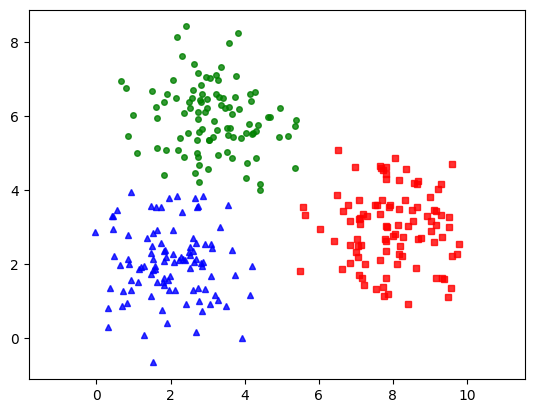

In [6]:
(centers, labels, it) = kmeans(X, K)
print('Centers found by our algorithm:')
print(centers[-1])

kmeans_display(X, labels[-1])

# Thuật toán Kmeans với thư viện Sklearn

# Comparing with Scikit-learn's K-means

Now we'll compare our implementation with the professional implementation in scikit-learn.
Scikit-learn is a popular machine learning library that includes many algorithms.

The main differences are:
1. Scikit-learn's implementation is more efficient
2. It has more options and parameters we can adjust
3. It's thoroughly tested and optimized

But the basic algorithm is the same as what we implemented!

Centers found by scikit-learn:
[[7.98281618 2.98255485]
 [1.99942868 2.03875716]
 [3.12850183 5.96119944]]


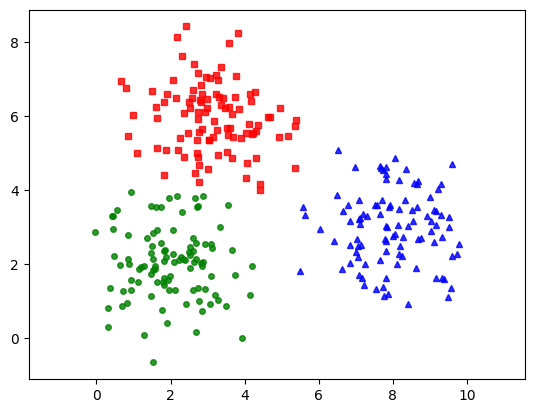

In [7]:
# Import the KMeans class from scikit-learn
from sklearn.cluster import KMeans

# Create a KMeans model with the same parameters as our implementation
# n_clusters=3: We want 3 clusters (same as our K=3)
# random_state=0: Set random seed for reproducible results
kmeans = KMeans(n_clusters=3, random_state=0)

# Fit the model to our data
# This does all the steps we did (initialize, assign, update)
# in one command
kmeans = kmeans.fit(X)

# Print the final cluster centers
# These should be similar to what our implementation found
print('Centers found by scikit-learn:')
print(kmeans.cluster_centers_)

# Predict which cluster each point belongs to
# This is the same as our kmeans_assign_labels function
pred_label = kmeans.predict(X)

# Display the results using our visualization function
# The plot should look similar to our implementation
kmeans_display(X, pred_label)